In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection

from sklearn import linear_model
from sklearn import neighbors
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
import xgboost
import catboost
import lightgbm

In [2]:
tipo = {'TYPE':str,'YEAR':np.int32,'MONTH':np.int32,'DAY':np.int32,'HOUR':np.int32,'MINUTE':np.int32,'HUNDRED_BLOCK':str,'NEIGHBOURHOOD':str,'X':np.float64,'Y':np.float64,'Latitude':np.float64,'Longitude':np.float64,'WEAK_DAY':str,'DAY_PERIOD':str,'Region':str}
data = pd.read_csv("crime_modificado.csv",dtype=tipo)
data.head(7)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,WEAK_DAY,DAY_PERIOD,Region
0,Other Theft,2003,5,12,16,15,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Segunda,afternoon,108
1,Other Theft,2003,5,7,15,20,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Quarta,afternoon,108
2,Other Theft,2003,4,23,16,40,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Quarta,afternoon,108
3,Other Theft,2003,4,20,11,15,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Domingo,morning,108
4,Other Theft,2003,4,12,17,45,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Sabado,afternoon,108
5,Other Theft,2003,3,26,20,45,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Quarta,night,108
6,Break and Enter Residential/Other,2003,3,10,12,0,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610,Segunda,morning,48


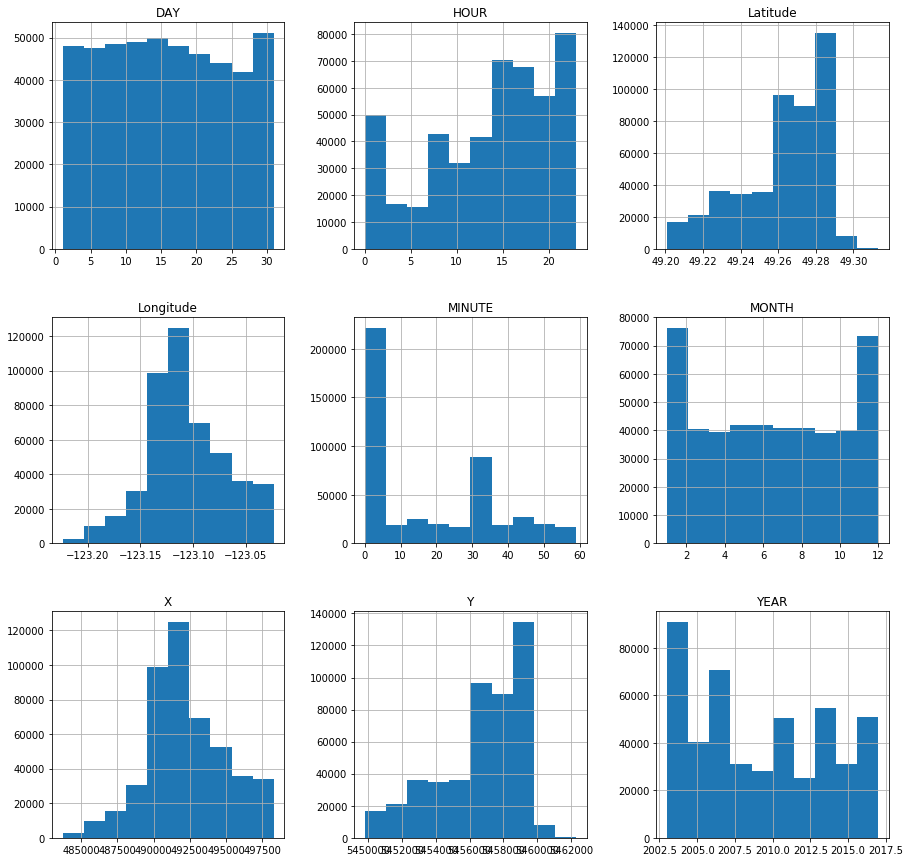

In [3]:
data.hist(figsize=(15,15));

In [4]:
data.shape

(474015, 15)

In [5]:
#print(data.isnull().sum())
#data = data.dropna(axis=0)import

In [6]:
data = data.drop(columns=['HOUR','HUNDRED_BLOCK','NEIGHBOURHOOD','Latitude','Longitude','YEAR','MINUTE','DAY','MONTH','X','Y'], axis=1)


In [7]:
data.shape

(474015, 4)

In [8]:
label = preprocessing.LabelEncoder()
data['TYPE'] = label.fit_transform(data['TYPE'])
#label1 = preprocessing.LabelEncoder()
#data['HUNDRED_BLOCK'] = label1.fit_transform(data['HUNDRED_BLOCK'])

#label2 = preprocessing.LabelEncoder()
#data['NEIGHBOURHOOD'] = label2.fit_transform(data['NEIGHBOURHOOD'])

#label3 = preprocessing.LabelEncoder()
#data['YEAR'] = label3.fit_transform(data['YEAR'])

#label4 = preprocessing.LabelEncoder()
#data['WEAK_DAY'] = label4.fit_transform(data['WEAK_DAY'])

#label5 = preprocessing.LabelEncoder()
#data['DAY_PERIOD'] = label5.fit_transform(data['DAY_PERIOD'])

data.head()

,TYPE,WEAK_DAY,DAY_PERIOD,Region
0,3,Segunda,afternoon,108
1,3,Quarta,afternoon,108
2,3,Quarta,afternoon,108
3,3,Domingo,morning,108
4,3,Sabado,afternoon,108


In [9]:
#ohe = preprocessing.OneHotEncoder(categorical_features=[4,5])
#X_Moral = ohe.fit_transform(data.iloc[:,1:])
#X_Moral = data.iloc[:,1:]
y_Moral = data.iloc[:,0]
#np.shape(X_Moral)
X_Moral = pd.get_dummies(data).iloc[:,1:]
X_Moral


,WEAK_DAY_Domingo,WEAK_DAY_Quarta,WEAK_DAY_Quinta,WEAK_DAY_Sabado,WEAK_DAY_Segunda,WEAK_DAY_Sexta,WEAK_DAY_Terca,DAY_PERIOD_afternoon,DAY_PERIOD_dawn,DAY_PERIOD_morning,...,Region_90,Region_91,Region_92,Region_93,Region_94,Region_95,Region_96,Region_97,Region_98,Region_99
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#ohe = preprocessing.OneHotEncoder(categorical_features=2)
#X_Moral_ = ohe.fit_transform(X_Moral)

In [11]:
modelo = ensemble.RandomForestClassifier(n_estimators=15,n_jobs=-1)
modelo.fit(X_Moral,y_Moral)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
modelo.feature_importances_

array([1.75925622e-02, 1.80312060e-02, 1.75967428e-02, 1.53145187e-02,
       1.69321255e-02, 1.65709925e-02, 1.84281084e-02, 6.34554289e-02,
       7.51578855e-02, 4.74301085e-02, 4.84414879e-02, 1.57477340e-03,
       2.01215890e-03, 1.58207929e-03, 3.59657958e-03, 5.04024582e-03,
       1.69252449e-02, 1.33129083e-02, 1.21463157e-02, 4.88053751e-03,
       7.82525964e-03, 3.25601002e-03, 2.16659787e-03, 1.84585251e-03,
       7.32157841e-03, 2.35591421e-02, 1.33424970e-01, 3.53881961e-02,
       6.11583575e-03, 5.53372862e-03, 6.22389301e-03, 2.78112420e-03,
       2.00337084e-03, 1.04179360e-04, 9.73289548e-05, 6.23230431e-03,
       9.64559529e-03, 3.42871408e-03, 2.77617469e-05, 1.35434442e-03,
       1.53936356e-03, 1.60685138e-03, 2.06984485e-03, 3.96469218e-04,
       1.82423162e-02, 1.92055760e-03, 7.69566471e-03, 6.46069604e-05,
       6.60410782e-04, 3.71123261e-03, 3.05409708e-03, 2.60730238e-03,
       1.88293486e-02, 3.19509771e-03, 2.26662341e-03, 1.54916086e-03,
      

In [ ]:
Fold =  model_selection.StratifiedShuffleSplit(n_splits=3,train_size=0.7,test_size=0.3,random_state=1)

In [ ]:

mediaaccKNN = 0
mediaaccL = 0
mediaaccS =0
mediaaccA = 0
mediaaccSGD = 0
mediaaccRF = 0
mediaaccXGB = 0
mediaaccCAT = 0
mediaaccTREE = 0
mediaaccLGBM = 0
i = 1
for train_,test_ in Fold.split(X_Moral,y_Moral):
    print("split {}".format(i))
    
    
    
    #stand = preprocessing.MinMaxScaler()
    #stand.fit(X_Moral.iloc[train_])
    #train = stand.transform(X_Moral.iloc[train_])
    #test = stand.transform(X_Moral.iloc[test_])
    train = X_Moral.iloc[train_]
    test = X_Moral.iloc[test_]
    print("KNN")
    KNN =  neighbors.KNeighborsClassifier(n_neighbors=5,n_jobs=-1,weights='distance')
    #KNN.fit(train,y_Moral.iloc[train_])
    #y_predK = KNN.predict(test)
    #accK = metrics.accuracy_score(y_Moral.iloc[test_], y_predK)
    #mediaaccKNN = mediaaccKNN + accK
    #print("Accuracy KNN:", accK)
    
    #Logistic Regression
    
    #LR =  linear_model.LogisticRegression()
    #LR.fit(train,y_Moral.iloc[train_])
    #y_predL = LR.predict(test)
    #accL = metrics.accuracy_score(y_Moral.iloc[test_], y_predL)
    #mediaaccL = mediaaccL + accL
    #print("Accuracy LR:", accL)
    
    #SGD = linear_model.SGDClassifier(penalty='l2',n_jobs=-1,random_state=2,max_iter=100)
    #SGD.fit(train,y_Moral.iloc[train_])
    #y_predSGD = SGD.predict(test)
    #accSGD = metrics.accuracy_score(y_Moral.iloc[test_], y_predSGD)
    #mediaaccSGD = mediaaccSGD + accSGD
    #print("Accuracy SGD:", accSGD)
    
    
    RF = ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1)
    RF.fit(train,y_Moral.iloc[train_])
    y_predRF = RF.predict(test)
    accRF = metrics.accuracy_score(y_Moral.iloc[test_], y_predRF)
    mediaaccRF = mediaaccRF + accRF
    print("Accuracy RF:", accRF)
    
    #SVM
    #SVM = svm.SVC()
    #SVM.fit(train,y_Moral.iloc[train_])
    #y_predS = SVM.predict(test)
    #accS = metrics.accuracy_score(y_Moral.iloc[test_], y_predS)
    #mediaaccS = mediaaccS + accS
    #print("Accuracy SVM:", accS)
    
    Ada = ensemble.AdaBoostClassifier(n_estimators=10,learning_rate=0.1)
    Ada.fit(train,y_Moral.iloc[train_])
    y_predA = Ada.predict(test)
    accA = metrics.accuracy_score(y_Moral.iloc[test_], y_predA)
    mediaaccA = mediaaccA + accA
    print("Accuracy Ada:", accA)
    
    
    TREE = tree.DecisionTreeClassifier()
    TREE.fit(train,y_Moral.iloc[train_])
    y_predTREE = TREE.predict(test)
    accTREE = metrics.accuracy_score(y_Moral.iloc[test_], y_predTREE)
    mediaaccTREE = mediaaccTREE + accTREE
    print("Accuracy TREE:", accTREE)
    
   

    
    XGB = xgboost.XGBClassifier(n_estimators=10,learning_rate=0.1, n_jobs=-1)
    XGB.fit(train,y_Moral.iloc[train_])
    y_predXGB = XGB.predict(test)
    accXGB = metrics.accuracy_score(y_Moral.iloc[test_], y_predXGB)
    mediaaccXGB = mediaaccXGB + accXGB
    print("Accuracy XGB:", accXGB)
    
    #CAT = catboost.CatBoostClassifier( learning_rate=0.1, l2_leaf_reg=3, loss_function='MultiClass',leaf_estimation_method='Gradient')
    #CAT.fit(train,y_Moral.iloc[train_])
    #y_predCAT = CAT.predict(test)
    #accCAT = metrics.accuracy_score(y_Moral.iloc[test_], y_predCAT)
    #mediaaccCAT = mediaaccCAT + accCAT
    #print("Accuracy CAT:", accCAT)
    
    LGBM = lightgbm.LGBMClassifier()
    LGBM.fit(train,y_Moral.iloc[train_])
    y_predLGBM = LGBM.predict(test)
    accLGBM = metrics.accuracy_score(y_Moral.iloc[test_], y_predLGBM)
    mediaaccLGBM = mediaaccLGBM + accLGBM
    print("Accuracy LGBM:", accLGBM)
    
    
    print()
    i= i+1
print()
print("--Média--")
mediaaccKNN = mediaaccKNN/Fold.n_splits
print("Média KNN:",mediaaccKNN)
mediaaccL = mediaaccL/Fold.n_splits
print("Média LR:",mediaaccL)

mediaaccSGD = mediaaccSGD/Fold.n_splits
print("Média SGD:",mediaaccSGD)
#mediaaccS = mediaaccS/Fold.n_splits
#print("Média SVM:",mediaaccS)
mediaaccRF = mediaaccRF/Fold.n_splits
print("Média RF:",mediaaccRF)
mediaaccA = mediaaccA/Fold.n_splits
print("Média Ada:",mediaaccA)

mediaaccTREE = mediaaccTREE/Fold.n_splits
print("Média TREE:",mediaaccTREE)

mediaaccXGB = mediaaccXGB/Fold.n_splits
print("Média XGB:",mediaaccXGB)
#mediaaccCAT = mediaaccCAT/Fold.n_splits
#print("Média CAT:",mediaaccCAT)
mediaaccLGBM = mediaaccLGBM/Fold.n_splits
print("Média LGBM:",mediaaccLGBM)


split 1
KNN
Accuracy RF: 0.37717379838964876
Accuracy Ada: 0.3605147498329876
Accuracy TREE: 0.3769909637495165


/home/johnny/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy XGB: 0.36441756618965576


/home/johnny/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy LGBM: 0.37941703878204003

split 2
KNN
Accuracy RF: 0.3745437924123624
Accuracy Ada: 0.3605147498329876


In [ ]:

mediaaccCAT = 0

i = 1
for train_,test_ in Fold.split(X_Moral):
    print("split {}".format(i))
    
    
    
    #stand = preprocessing.MinMaxScaler()
    #stand.fit(X_Moral.iloc[train_],y_Moral.iloc[train_])
    #train = stand.transform(X_Moral.iloc[train_])
    #test = stand.transform(X_Moral.iloc[test_])
    train = X_Moral.iloc[train_]
    test = X_Moral.iloc[test_]
    
    
    CAT = catboost.CatBoostClassifier( learning_rate=0.1, l2_leaf_reg=3, loss_function='MultiClass',leaf_estimation_method='Gradient')
    CAT.fit(train,y_Moral.iloc[train_])
    y_predCAT = CAT.predict(test)
    accCAT = metrics.accuracy_score(y_Moral.iloc[test_], y_predCAT)
    mediaaccCAT = mediaaccCAT + accCAT
    print("Accuracy CAT:", accCAT)
    
    
    print()
    i= i+1
print()
print("--Média--")
mediaaccCAT = mediaaccCAT/Fold.n_splits
print("Média CAT:",mediaaccCAT)

